In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import random
import requests

import fastf1 as ff1
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:

def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [13]:
ergast_retrieve('2022/3/driverStandings')

{'xmlns': 'http://ergast.com/mrd/1.5',
 'series': 'f1',
 'url': 'http://ergast.com/api/f1/2022/3/driverstandings.json',
 'limit': '30',
 'offset': '0',
 'total': '21',
 'StandingsTable': {'season': '2022',
  'round': '3',
  'StandingsLists': [{'season': '2022',
    'round': '3',
    'DriverStandings': [{'position': '1',
      'positionText': '1',
      'points': '71',
      'wins': '2',
      'Driver': {'driverId': 'leclerc',
       'permanentNumber': '16',
       'code': 'LEC',
       'url': 'http://en.wikipedia.org/wiki/Charles_Leclerc',
       'givenName': 'Charles',
       'familyName': 'Leclerc',
       'dateOfBirth': '1997-10-16',
       'nationality': 'Monegasque'},
      'Constructors': [{'constructorId': 'ferrari',
        'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
        'name': 'Ferrari',
        'nationality': 'Italian'}]},
     {'position': '2',
      'positionText': '2',
      'points': '37',
      'wins': '0',
      'Driver': {'driverId': 'russell',
       

In [16]:
# Specify the number of rounds we want in our plot (in other words, specify the current round)
rounds = 22

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'2022/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        # Store the drivers' position
        current_round[driver] = int(position)
        
        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')
    
    

https://medium.com/towards-formula-1-analysis/how-to-visualize-the-formula-1-championship-in-python-using-the-ergast-api-and-seaborn-ac2f88ae7248


In [17]:
# Melt data so it can be used as input for plot
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])


In [18]:
all_championship_standings_melted

,round,variable,value
0,1,LEC,1.0
1,2,LEC,1.0
2,3,LEC,1.0
3,4,LEC,1.0
4,5,LEC,1.0
...,...,...,...
479,18,DEV,21.0
480,19,DEV,21.0
481,20,DEV,21.0
482,21,DEV,21.0


In [20]:
from fastf1 import plotting

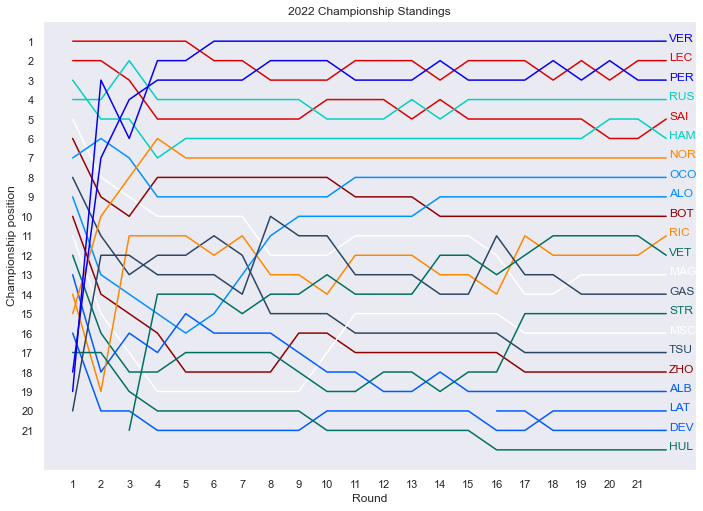

In [21]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2022 Championship Standings")

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver], 
        color=ff1.plotting.team_color(driver_team_mapping[driver])
    )

# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )


In [23]:
rounds = 12

# Initiate an empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'2023/{i}/driverStandings')
    
    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}
    
    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        # Store the drivers' position
        current_round[driver] = int(position)
        
        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
    
# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')
    

In [24]:
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])

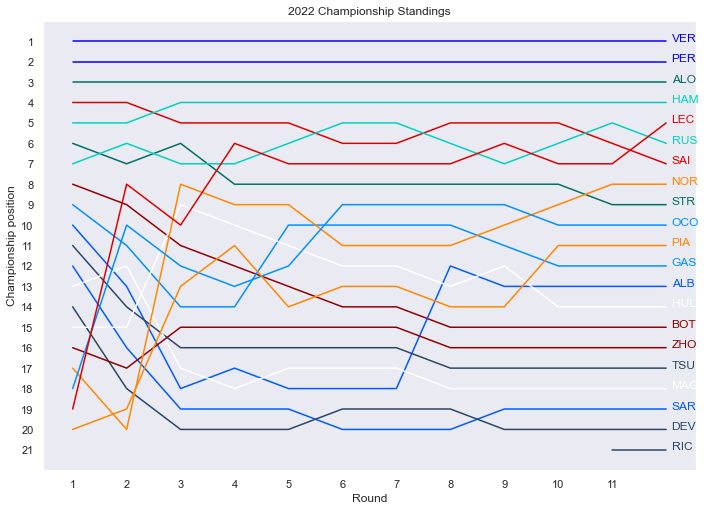

In [25]:
# Increase the size of the plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Initiate the plot
fig, ax = plt.subplots()

# Set the title of the plot
ax.set_title("2022 Championship Standings")

# Draw a line for every driver in the data by looping through all the standings
# The reason we do it this way is so that we can specify the team color per driver
for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver], 
        color=ff1.plotting.team_color(driver_team_mapping[driver])
    )

# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values that appear on the x- and y-axes
ax.set_xticks(range(1, rounds))
ax.set_yticks(range(1, 22))

# Set the labels of the axes
ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

# Disable the gridlines 
ax.grid(False)


# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )
